## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [2]:
fraud = pd.read_csv('Fraud_check.csv')

In [3]:
fraud.head(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


## EDA

###  Over view of Data

In [4]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
fraud.shape

(600, 6)

In [6]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


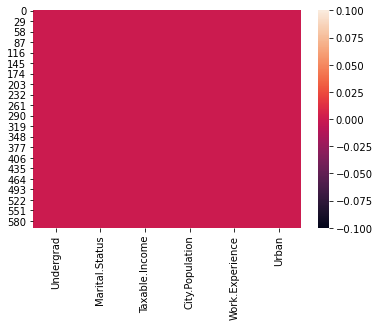

In [7]:
sns.heatmap(fraud.isnull())
plt.show()

##### * No null values in the data

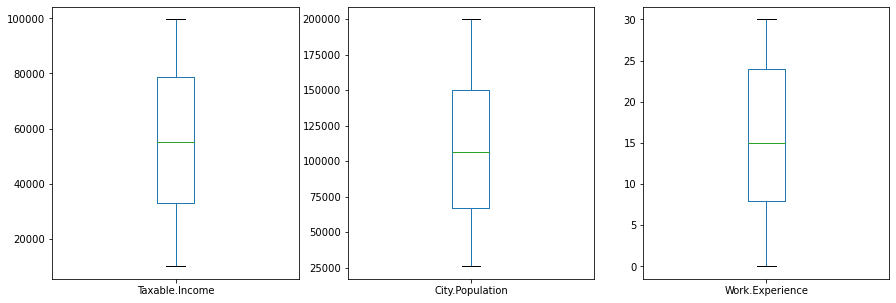

In [8]:
fraud.plot(kind='box', subplots=True, figsize=(15,5))
plt.show()

##### * No oultliers found in data

### Adding new column 'income'

In [9]:
fraud['income'] = '<=30000'

### Converting the Taxable.Income variable to bucketing

In [10]:
fraud.loc[fraud['Taxable.Income'] > 30000 , 'income'] = 'Good'
fraud.loc[fraud['Taxable.Income'] <= 30000, 'income'] = 'Risky'

### Droping the Taxable income variable

In [11]:
fraud.drop('Taxable.Income', axis = 1, inplace=True)

In [12]:
fraud.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


### Encoding the object columns

#### Model.fit doesnt not consider String. So, we encode 

In [13]:
label_en = preprocessing.LabelEncoder()

In [14]:
fraud['income'] = label_en.fit_transform(fraud['income'])
fraud['Undergrad'] = label_en.fit_transform(fraud['Undergrad'])
fraud['Marital.Status'] = label_en.fit_transform(fraud['Marital.Status'])
fraud['Urban'] = label_en.fit_transform(fraud['Urban'])

In [15]:
fraud.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


### Splitting Dataset into features & labels 

In [16]:
x = fraud.iloc[:,:-1]
y = fraud.iloc[:,-1]

In [17]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


### Normalizing the dataset

In [18]:
scaler = MinMaxScaler()
x_norm = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x_norm

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0.0,1.0,0.139472,0.333333,1.0
1,1.0,0.0,0.622394,0.600000,1.0
2,0.0,0.5,0.772568,1.000000,1.0
3,1.0,1.0,0.962563,0.500000,1.0
4,0.0,0.5,0.010081,0.933333,0.0
...,...,...,...,...,...
595,1.0,0.0,0.078811,0.233333,1.0
596,1.0,0.0,0.170058,0.066667,1.0
597,0.0,0.0,0.737240,0.000000,1.0
598,1.0,0.5,0.886810,0.566667,0.0


In [19]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: income, Length: 600, dtype: int32

### Splitting data into train-test for model validation

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.25, random_state=40, stratify=y)

In [21]:
x_train

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
200,1.0,1.0,0.787349,0.566667,1.0
115,1.0,0.0,0.301565,0.700000,1.0
451,1.0,0.0,0.474043,0.333333,1.0
565,0.0,0.0,0.030374,0.933333,0.0
389,1.0,1.0,0.904649,0.166667,1.0
...,...,...,...,...,...
379,0.0,1.0,0.499974,0.433333,0.0
456,0.0,1.0,0.160972,0.766667,1.0
37,0.0,0.5,0.236398,0.166667,1.0
38,0.0,1.0,0.872396,0.100000,0.0


In [22]:
y_train

200    0
115    0
451    0
565    0
389    0
      ..
379    1
456    0
37     0
38     1
539    0
Name: income, Length: 450, dtype: int32

In [23]:
y_train.value_counts()

0    357
1     93
Name: income, dtype: int64

#### * Data is imbalanced

# Building Model

## Model creation with imbalanced data

In [24]:
model = RandomForestClassifier(n_estimators=100, random_state=40)
criterion=['entropy', 'gini']
max_depth=range(1,5)
params = [{'criterion':criterion, 'max_depth':max_depth}]
grid = GridSearchCV(estimator=model, param_grid=params, cv=5)
grid.fit(x_train, y_train)
print('Best parameter : ', grid.best_params_)
print('Best score     : ', grid.best_score_)

Best parameter :  {'criterion': 'entropy', 'max_depth': 1}
Best score     :  0.7933333333333332


In [25]:
model_1 = RandomForestClassifier(criterion='entropy', max_depth=1, random_state=40)
model_1.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=1, random_state=40)

### Model Evaluation with trained data

In [26]:
y_train_pred = model_1.predict(x_train)

#### Calculating accuracy of trained data

In [27]:
print('Accuracy score of Trained data: ', round(accuracy_score(y_train, y_train_pred),4) * 100 )

Accuracy score of Trained data:  79.33


In [28]:
print(confusion_matrix(y_train, y_train_pred))

[[357   0]
 [ 93   0]]


In [29]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       357
           1       0.00      0.00      0.00        93

    accuracy                           0.79       450
   macro avg       0.40      0.50      0.44       450
weighted avg       0.63      0.79      0.70       450



### Model validation on test data

In [30]:
y_test_pred = model_1.predict(x_test)

#### Checking Accuracy of model

In [31]:
print('Accuracy score of Test data: ', 100*round(accuracy_score(y_test, y_test_pred),4) )

Accuracy score of Test data:  79.33


In [32]:
print(confusion_matrix(y_test, y_test_pred))

[[119   0]
 [ 31   0]]


In [33]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       119
           1       0.00      0.00      0.00        31

    accuracy                           0.79       150
   macro avg       0.40      0.50      0.44       150
weighted avg       0.63      0.79      0.70       150



### Observation:

#### Model built is more biased since recall value of minority class is showing 0 value. So need to balance the data to increase the recall value. So that model will predict properly.

## Balancing the data

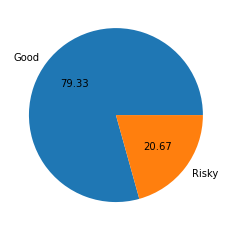

In [34]:
plt.pie(y_train.value_counts(), autopct='%0.2f', labels=['Good', 'Risky'], data=y_train)
plt.show()

### Applying SMOTE technique

In [35]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=40)
x_train_resample, y_train_resample = sm.fit_resample(x_train, y_train)

In [36]:
print('x_train after resampling shape : ' , x_train_resample.shape)
print('y_train after resampling shape : ' , y_train_resample.shape)
print(y_train_resample.value_counts())

x_train after resampling shape :  (714, 5)
y_train after resampling shape :  (714,)
0    357
1    357
Name: income, dtype: int64


## Model creation with balanced data

In [37]:
model = RandomForestClassifier(n_estimators=100, random_state=40)
criterion=['entropy', 'gini']
max_depth=range(1,5)
params = [{'criterion':criterion, 'max_depth':max_depth}]
grid = GridSearchCV(estimator=model, param_grid=params, cv=5)
grid.fit(x_train_resample, y_train_resample)
print('Best parameter : ', grid.best_params_)
print('Best score     : ', grid.best_score_)

Best parameter :  {'criterion': 'entropy', 'max_depth': 4}
Best score     :  0.6638431990544666


In [38]:
model_final = RandomForestClassifier(n_estimators=100,criterion='entropy', max_depth=4, random_state=40)
model_final.fit(x_train_resample, y_train_resample)

RandomForestClassifier(criterion='entropy', max_depth=4, random_state=40)

### Model Evaluation with trained data

In [39]:
y_train_pred_1 = model_final.predict(x_train_resample)

#### Calculating accuracy of trained data

In [40]:
print('Accuracy score of Trained data: ', round(accuracy_score(y_train_resample, y_train_pred_1),4) * 100 )

Accuracy score of Trained data:  72.97


In [41]:
print(confusion_matrix(y_train_resample, y_train_pred_1))

[[224 133]
 [ 60 297]]


In [42]:
print(classification_report(y_train_resample, y_train_pred_1))

              precision    recall  f1-score   support

           0       0.79      0.63      0.70       357
           1       0.69      0.83      0.75       357

    accuracy                           0.73       714
   macro avg       0.74      0.73      0.73       714
weighted avg       0.74      0.73      0.73       714



### Model validation on test data

In [43]:
y_test_pred_1 = model_final.predict(x_test)

#### Checking Accuracy of model

In [44]:
print('Accuracy score of Test data: ', 100*round(accuracy_score(y_test, y_test_pred_1),4) )

Accuracy score of Test data:  57.99999999999999


In [45]:
print(confusion_matrix(y_test, y_test_pred_1))

[[77 42]
 [21 10]]


In [46]:
print(classification_report(y_test, y_test_pred_1))

              precision    recall  f1-score   support

           0       0.79      0.65      0.71       119
           1       0.19      0.32      0.24        31

    accuracy                           0.58       150
   macro avg       0.49      0.48      0.48       150
weighted avg       0.66      0.58      0.61       150



# Conclusion

* This final model(built after handling imbalanced data) is better than the first model(built with imbalanced data) because it classifies better and also the recall value of minority class is incresed to 32 %. But due to undersampling of majority class, its recall has decreased to 65 %. So in this case, SMOTE is giving a good recall value.